In [1]:
from IPython.display import Image
%matplotlib inline

### Dealing with Missing Data

In [6]:
import pandas as pd
from io import StringIO
csv_data = """A,B,C,D
1.0, 2.0, 3.0, 4.0
5.0, 6.0,, 8.0
10.0, 11.0, 12.0"""
csv_data = unicode(csv_data)
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1,2,3,4
1,5,6,NaN,8
2,10,11,12,NaN


In [7]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [9]:
df.values  # Access the NumPy array via the value attribute

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,  nan,   8.],
       [ 10.,  11.,  12.,  nan]])

In [10]:
df.dropna()  # remove rows which contain missing values

,A,B,C,D
0,1,2,3,4


In [11]:
df.dropna(axis=1)  # drop columns which contains at least one missing values

,A,B
0,1,2
1,5,6
2,10,11


In [12]:
# Only drop rows where all columns are NaN
df.dropna(how="all")

,A,B,C,D
0,1,2,3,4
1,5,6,NaN,8
2,10,11,12,NaN


In [16]:
# Drop rows that have not at least 4 non-NaN values 
df.dropna(thresh=4)

,A,B,C,D
0,1,2,3,4


In [17]:
# Only drop rows where NaN appear in specific columns(here: "C")
df.dropna(subset=["C"])

,A,B,C,D
0,1,2,3,4
2,10,11,12,NaN


### Imputing missing values

In [18]:
## Mean Imputation 
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values="NaN", strategy="mean", axis=0) ## change to axis = 1, then calculate row means
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [ 10. ,  11. ,  12. ,   6. ]])

### Handling categorical data

In [44]:
import pandas as pd
df = pd.DataFrame([["green","M",10.1, "class1"],
                   ["red", "L", 13.5, "class2"],
                   ["blue", "XL", 15.3, "class1"]])
df.columns = ["color", "size", "price", "classlabel"]
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


### Mapping ordinal features

In [45]:
size_mapping = {"XL": 3,
                "L": 2,
                "M": 1}
df.size = df["size"].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [46]:
# if we want to transform the integers back to the original string representation
inv_size_mapping = {v:k for k,v in size_mapping.items()}
inv_size_mapping

{1: 'M', 2: 'L', 3: 'XL'}

### Encoding class labels

In [47]:
## Works for multiclass labels
import numpy as np
class_mapping = {label:idx for idx, label in enumerate(np.unique(df["classlabel"]))}
class_mapping
df.classlabel = df["classlabel"].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [48]:
## Works for binary class labels 
#import numpy as np
#df.classlabel = np.where(df["classlabel"]=="class1",0,1)
#df

In [49]:
## Convert it back to string 
inv_class_mapping = {v:k for k, v in class_mapping.items()}
df.classlabel = df["classlabel"].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [50]:
## Alternatively, using LabelEncoder class in Sklearn
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df["classlabel"].values) ## Applied on NumPy Arrays
y

array([0, 1, 0])

In [51]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

### Performing one-hot encoding on nominal features

In [53]:
## Using the similar approach to transfrom nominal color column
X = df[["color","size","price"]].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [60]:
## Applied on NumPy Arrays 
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [61]:
## Applied on DataFrame, the get_dummies method will only convert string columns and leave all other columns unchanged
pd.get_dummies(df[["price","color","size"]])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


### Partitioning a dataset in training and test sets

In [84]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

('Class labels', array([1, 2, 3]))


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [85]:
df_wine.shape 

(178, 14)

In [86]:
from sklearn.cross_validation import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Bringing features onto the same scale

In [87]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [88]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [89]:
ex = pd.DataFrame([0, 1, 2, 3, 4, 5])

# standardize
ex[1] = (ex[0] - ex[0].mean()) / ex[0].std(ddof=0)

# Please note that pandas uses ddof=1 (sample standard deviation) 
# by default, whereas NumPy's std method and the StandardScaler
# uses ddof=0 (population standard deviation)

# normalize
ex[2] = (ex[0] - ex[0].min()) / (ex[0].max() - ex[0].min())
ex.columns = ['input', 'standardized', 'normalized']
ex

,input,standardized,normalized
0,0,-1.46385,0.0
1,1,-0.87831,0.2
2,2,-0.29277,0.4
3,3,0.29277,0.6
4,4,0.87831,0.8
5,5,1.46385,1.0


### Selecting meaningful features

In [90]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty="l1", C = 0.1)
lr.fit(X_train_std, y_train)
print("Training accuracy: ", lr.score(X_train_std, y_train))
print("Test accuracyL ", lr.score(X_test_std, y_test))

('Training accuracy: ', 0.9838709677419355)
('Test accuracyL ', 0.98148148148148151)


In [91]:
lr.intercept_

array([-0.38378931, -0.15817241, -0.70037496])

In [92]:
lr.coef_

array([[ 0.27994221,  0.        ,  0.        , -0.02791489,  0.        ,
         0.        ,  0.70992068,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23658709],
       [-0.64371473, -0.06892117, -0.05714397,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92741662,
         0.05968927,  0.        , -0.37095137],
       [ 0.        ,  0.06138846,  0.        ,  0.        ,  0.        ,
         0.        , -0.63686624,  0.        ,  0.        ,  0.49848754,
        -0.35818433, -0.57033053,  0.        ]])

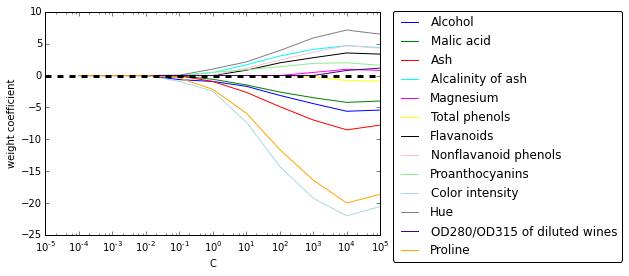

In [96]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']
weights, params = [],[]
for c in np.arange(-4,6):
    lr = LogisticRegression(penalty="l1", C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
for column, color in zip(range(weights.shape[1]),colors):
    plt.plot(params, weights[:,column], label=df_wine.columns[column+1], color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)

### Sequential feature selection algorithms¶


In [101]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = estimator
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores, subsets = [],[]
            
            for p in combinations(self.indices_, r = dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test,y_pred)
        return score

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

<__main__.SBS instance at 0x107ed9638>

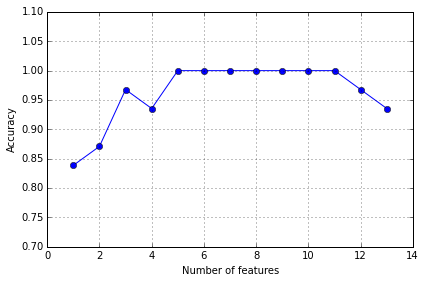

In [103]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker="o")
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()

In [107]:
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

Index([u'Alcohol', u'Malic acid', u'Alcalinity of ash', u'Hue', u'Proline'], dtype='object')


In [109]:
knn.fit(X_train_std, y_train)
print("Training accuracy: ", knn.score(X_train_std, y_train))
print("Test accuracyL ", knn.score(X_test_std, y_test))

('Training accuracy: ', 0.9838709677419355)
('Test accuracyL ', 0.94444444444444442)


In [110]:
knn.fit(X_train_std[:,k5], y_train)
print("Training accuracy: ", knn.score(X_train_std[:,k5], y_train))
print("Test accuracyL ", knn.score(X_test_std[:,k5], y_test))

('Training accuracy: ', 0.95967741935483875)
('Test accuracyL ', 0.96296296296296291)


### Assessing Feature Importances with Random Forests

In [113]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Color intensity                0.182508
 2) Proline                        0.158574
 3) Flavanoids                     0.150954
 4) OD280/OD315 of diluted wines   0.131983
 5) Alcohol                        0.106564
 6) Hue                            0.078249
 7) Total phenols                  0.060717
 8) Alcalinity of ash              0.032039
 9) Malic acid                     0.025385
10) Proanthocyanins                0.022369
11) Magnesium                      0.022070
12) Nonflavanoid phenols           0.014655
13) Ash                            0.013933


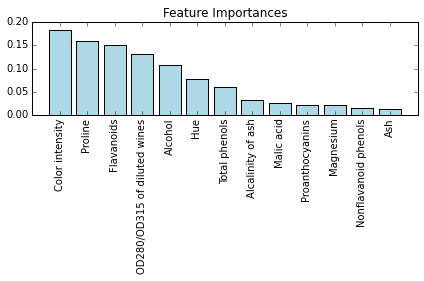

In [114]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()

In [115]:
X_selected = forest.transform(X_train, threshold=0.15)
X_selected.shape

(124, 3)

In [116]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Color intensity                0.182508
 2) Proline                        0.158574
 3) Flavanoids                     0.150954
